[[0.0035266  0.00152343]
 [0.00152343 0.00156933]]
Beta from formula: 0.9707495612765603
Beta from regression: 0.9707495612765604


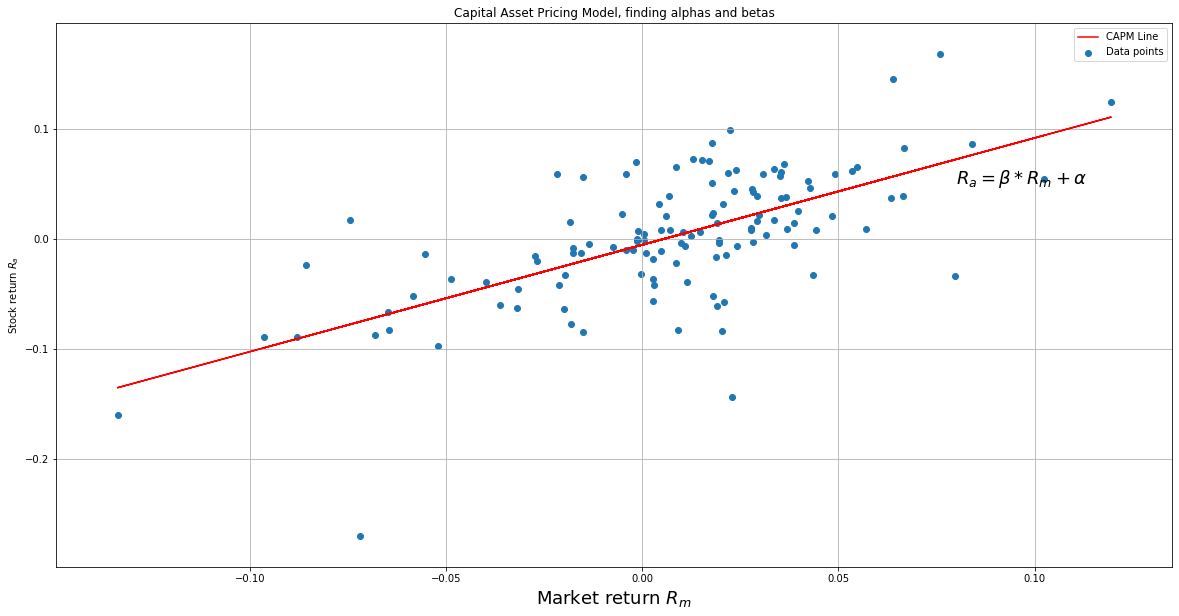

Expected return: 0.098842002414029


In [3]:
import pandas_datareader as pdr
from pandas_datareader import data, wb
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

risk_free_rate = 0.05

def capm(start_date, end_date, ticker1, ticker2):

	#get the data from Yahoo Finance
	stock1 = pdr.get_data_yahoo(ticker1, start_date, end_date)
	stock2 = pdr.get_data_yahoo(ticker2, start_date, end_date)
    
	#we prefer monthly returns instead of daily returns
	return_stock1 = stock1.resample('M').last()
	return_stock2 = stock2.resample('M').last()

	#creating a dataFrame from the data - Adjusted Closing Price is used as usual
	data = pd.DataFrame({'s_adjclose' : return_stock1['Adj Close'], 'm_adjclose' : return_stock2['Adj Close']}, index=return_stock1.index)
	#natural logarithm of the returns
	data[['s_returns', 'm_returns']] = np.log(data[['s_adjclose','m_adjclose']]/data[['s_adjclose','m_adjclose']].shift(1))
	#no need for NaN/missing values values so let's get rid of them
	data = data.dropna()

	#covariance matrix: the diagonal items are the vairances - off diagonals are the covariances
	#the matrix is symmetric: cov[0,1] = cov[1,0] !!!
	covmat = np.cov(data["s_returns"], data["m_returns"])
	print(covmat)
	
	#calculating beta according to the formula
	beta = covmat[0,1]/covmat[1,1]
	print("Beta from formula:", beta)

	#using linear regression to fit a line to the data [stock_returns, market_returns] - slope is the beta
	beta,alpha = np.polyfit(data["m_returns"], data['s_returns'], deg=1)
	print("Beta from regression:", beta)
	
	#plot
	fig,axis = plt.subplots(1,figsize=(20,10))
	axis.scatter(data["m_returns"], data['s_returns'], label="Data points")
	axis.plot(data["m_returns"], beta*data["m_returns"] + alpha, color='red', label="CAPM Line")
	plt.title('Capital Asset Pricing Model, finding alphas and betas')
	plt.xlabel('Market return $R_m$', fontsize=18)
	plt.ylabel('Stock return $R_a$')
	plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
	plt.legend()
	plt.grid(True)
	plt.show()
	
	#calculate the expected return according to the CAPM formula
	expected_return = risk_free_rate + beta*(data["m_returns"].mean()*12-risk_free_rate)
	print("Expected return:", expected_return)

if __name__ == "__main__":
	#using historical data 2010-2017: the market is the S&P500 !!!
	capm('2010-01-01', '2020-06-29','IBM', '^GSPC')